## Indirect Method

In [28]:
#pca reduce dimension
#Factor analysis ind underlying factor that influence data and features and find corelationship btwn factors


#1 Get data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#dummy dataset
print("Data :")
X=np.random.randint(10,50,100).reshape(20,5)
X



Data :


array([[19, 15, 45, 49, 18],
       [42, 14, 43, 29, 25],
       [40, 29, 40, 30, 31],
       [27, 40, 47, 27, 18],
       [12, 12, 15, 16, 43],
       [14, 11, 12, 15, 32],
       [39, 40, 24, 21, 35],
       [34, 41, 49, 30, 32],
       [28, 17, 15, 18, 11],
       [30, 38, 38, 48, 14],
       [44, 22, 19, 48, 37],
       [21, 43, 37, 24, 47],
       [29, 15, 30, 24, 13],
       [39, 37, 39, 48, 15],
       [43, 23, 48, 46, 47],
       [43, 26, 16, 13, 45],
       [33, 29, 19, 23, 18],
       [33, 18, 38, 49, 16],
       [34, 13, 30, 27, 22],
       [33, 48, 19, 22, 20]])

In [9]:
# 2 Find mean and subtracct from X..row wise mean
print("Mean :")
mean=np.mean(X,axis=0)  #0 rep row but calculate of cols
mean

Mean :


array([27.75, 28.35, 32.3 , 26.85, 29.45])

In [10]:
X_meaned=X-mean
X_meaned

array([[  4.25,   5.65,   5.7 ,   0.15,  -4.45],
       [  3.25,   4.65,   8.7 , -15.85,  19.55],
       [  3.25,   6.65, -12.3 ,  22.15,  -7.45],
       [ -3.75,  -7.35,  15.7 ,  20.15,  -8.45],
       [ 10.25,  -5.35,   1.7 ,  11.15,  -4.45],
       [ -5.75, -15.35,  -9.3 ,  -2.85,   2.55],
       [-13.75,  -9.35,   5.7 ,  -0.85,  -6.45],
       [ -4.75,   8.65,   4.7 ,   5.15, -16.45],
       [  8.25,   0.65, -20.3 ,  -0.85,   4.55],
       [ 12.25,   8.65,   5.7 ,   4.15,   5.55],
       [  0.25,   9.65,   2.7 , -11.85,  13.55],
       [-13.75, -10.35,  14.7 ,  -1.85,   2.55],
       [  6.25,  -3.35, -12.3 ,   7.15, -16.45],
       [-16.75,   9.65, -21.3 ,  -5.85,  18.55],
       [  7.25,  -9.35,   4.7 ,   8.15, -16.45],
       [ 15.25, -17.35,  11.7 , -15.85, -17.45],
       [ -8.75,  16.65, -18.3 ,  -3.85,  12.55],
       [-11.75, -10.35,  12.7 ,  -5.85,  14.55],
       [ -4.75,  14.65,  -9.3 , -10.85,  -3.45],
       [ 13.25,   2.65,   8.7 ,  -1.85,   7.55]])

In [11]:
#3 Covariance Matrix

#observations (rows) and  variables (columns)..here rowvar=false means variables is in col..if true variable in row
print("Covariance Matrix :")
cov_mat=np.cov(X_meaned,rowvar=False)
cov_mat


Covariance Matrix :


array([[ 96.19736842,  -5.69736842,  15.13157895,  11.53947368,
        -38.46052632],
       [ -5.69736842, 102.76578947, -55.47894737,  -7.68157895,
         44.99210526],
       [ 15.13157895, -55.47894737, 144.22105263,  -4.00526316,
        -23.66842105],
       [ 11.53947368,  -7.68157895,  -4.00526316, 107.50263158,
        -59.03421053],
       [-38.46052632,  44.99210526, -23.66842105, -59.03421053,
        144.05      ]])

In [12]:
# 4 Compute Eigen Vectors and Eigen values
print("Eigen Vectors and Eigen values :")
eigen_values,eigen_vectors=np.linalg.eigh(cov_mat)


print("Eigen Vectors :")
eigen_vectors





Eigen Vectors and Eigen values :
Eigen Vectors :


array([[ 0.34734632,  0.00813557, -0.8872163 ,  0.1375656 , -0.27056845],
       [-0.57628858,  0.53612674, -0.30504767,  0.31261367,  0.43552062],
       [-0.22001839,  0.50953642, -0.05033613, -0.69445209, -0.45515615],
       [ 0.40010794,  0.59890934,  0.34142058,  0.50496675, -0.33115226],
       [ 0.58202024,  0.30689114, -0.02629484, -0.38222151,  0.64829435]])

In [13]:
#5 Sort Eig values in Descending Order to get highest element first
# 0  1  2        1  2  0
#[30 10 20]  -->[10 20 30]  sorted ascending
#Thus, np.argsort(arr) returns [1, 2, 0] because:

sorted_indices=np.argsort(eigen_values)[::-1]
sorted_indices


array([4, 3, 2, 1, 0])

In [14]:
# we cant directly print sorted eigenvalues so we first sort them internally and get their order of sorting with argsort
sorted_eigenValues=eigen_values[sorted_indices]
sorted_eigenValues

array([237.09929794, 156.08340804,  89.51643723,  67.1253625 ,
        44.9123364 ])

In [15]:
sorted_vectors=eigen_vectors[:,sorted_indices]
sorted_vectors

array([[-0.27056845,  0.1375656 , -0.8872163 ,  0.00813557,  0.34734632],
       [ 0.43552062,  0.31261367, -0.30504767,  0.53612674, -0.57628858],
       [-0.45515615, -0.69445209, -0.05033613,  0.50953642, -0.22001839],
       [-0.33115226,  0.50496675,  0.34142058,  0.59890934,  0.40010794],
       [ 0.64829435, -0.38222151, -0.02629484,  0.30689114,  0.58202024]])

In [16]:
#6 Select subsets from each sorted

# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
##7.22,5.66,4.4,

n_componants=2
eigenvector_subset=sorted_vectors[:,0:n_componants]
eigenvector_subset

array([[-0.27056845,  0.1375656 ],
       [ 0.43552062,  0.31261367],
       [-0.45515615, -0.69445209],
       [-0.33115226,  0.50496675],
       [ 0.64829435, -0.38222151]])

In [25]:
#7 Transform the data
X_reduced_pretranspose=np.dot(eigenvector_subset.transpose(),X_meaned.transpose())
X_reduced=X_reduced_pretranspose.transpose()
X_reduced




array([[ -4.21819723,   0.1691749 ],
       [ 15.10888264, -19.61714488],
       [ -4.54953007,  25.10029348],
       [-21.48320166,  -0.31162747],
       [-12.45438493,   5.88826074],
       [  1.70041392,  -1.54503772],
       [ -6.84621072,  -6.73673472],
       [ -9.45665661,   7.67486943],
       [ 10.52178729,  13.26716283],
       [  0.08215145,   0.4051926 ],
       [ 15.61475288,  -9.98686478],
       [ -5.21233532, -17.24437751],
       [-10.58380689,  18.25234601],
       [ 32.39272252,   5.46006291],
       [-21.53630591,   5.21351091],
       [-23.07175175, -12.78501863],
       [ 27.35928012,   9.96878973],
       [  4.2609813 , -22.18686727],
       [ 13.25491589,   6.22453301],
       [ -0.88350692,  -7.21052356]])

The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

Now we can visualize our data with the available tools we have

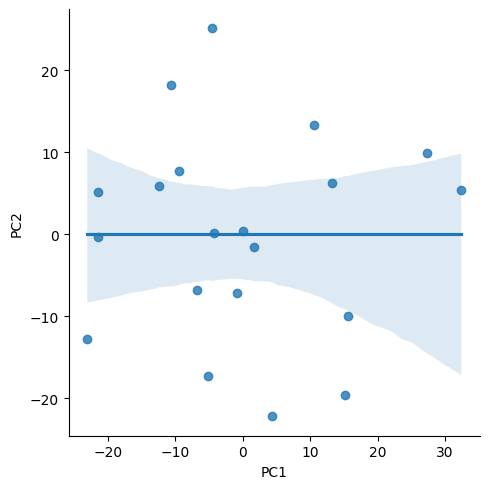

In [24]:
#X_reduceFinal=pd.DataFrame(X_reduced,columns=["Dim 1", "Dim 2"]) # Original line
X_reduceFinal=pd.DataFrame(X_reduced,columns=["PC1", "PC2"]) # Changed column names to match what sns.lmplot expects.
X_reduceFinal

import seaborn as sns
sns.lmplot(x='PC1',y='PC2',data=X_reduceFinal,fit_reg=True)

--------------------------------------------------------------------------------

## Direct Method

In [56]:
###PCA on IRIS dataset

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


iris=load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()


#Get the IRIS dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
# data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
# get first 4 features except target..as we perform PCA on first 4
# #prepare the data
# x = data.iloc[:,0:4]
# x

In [58]:

# #prepare the target
# target = data.iloc[:,4]
# target

target=iris.target_names[iris.target]

targetdf=pd.DataFrame(target,columns=['target'])
targetdf.head()


,target
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [61]:

#Applying it to PCA function
#mat_reduced = PCA(n_components=2)

pca=PCA(n_components=3)
principalComponents = pca.fit_transform(iris_df)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(principalComponents , columns = ['PC1', 'PC2','PC3'])

#Concat it with target variable to create a complete Dataset
#final concatenated
# principal_df = pd.concat([principal_df ,targetdf] , axis = 1)
# principal_df
principal_df['target']=target
principal_df

,PC1,PC2,PC3,target
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


<Axes: xlabel='PC1', ylabel='PC2'>

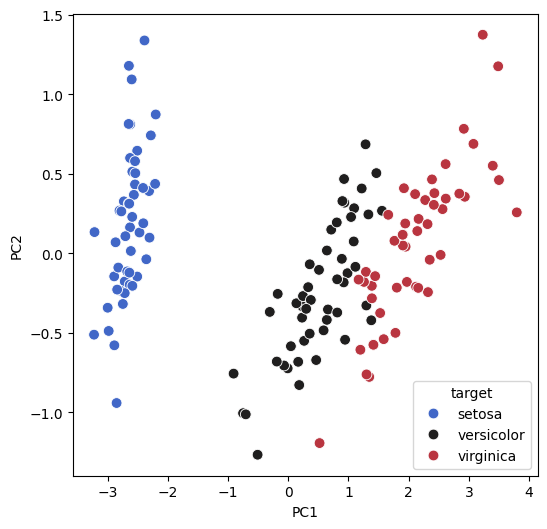

In [63]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
